<a href="https://colab.research.google.com/github/initiative1972/data-science/blob/main/pytorch_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="right"><td>
</td><td>
  <a target="_blank"  href="https://www.weclouddata.com/">
    <img width=128px src="https://www.weclouddata.com/wp-content/uploads/2021/01/WCD-Logo.svg" /></a>
</td></table>

#Pytorch Intro - ML Engineer bootcamp taster

Alright! Let's get started with a bit of Pytorch 101! In the following sessions we'll take a hands-on look at:

- Out of the box operations available on the fly with Pytorch
- The intuition behind the building blocks of a neural network.
- Building our first neural net, and manifesting their decision boundaries.
- Finally we'll finish with a couple of vision based networks as it'll help us continue our visual theme before moving on to the wide and wild variety of architectures available to us in the world of deep learning.


Let's get started by mounting the shared folder I gave you all. Don't worrry too much if you're having trouble. This is merely so we can plot a complex image in 3D later in our session.

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision
import numpy as np

In [ ]:
torch.__version__

'1.10.0+cu111'

Now that we have torch available note that we should check that hardware accelaration is available and assign the available device reaady for use with training and inference pipelines.

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  print('using gpu!')
else:
  device = torch.device('cpu')
  print('using cpu!')

#or
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
#check = torch.load('/content/check.pth', map_location=device)

using gpu!


In [ ]:
!nvidia-smi

Thu Jan 13 18:13:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    24W / 300W |      2MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

We're pretty lucky here in that Colaboratory is able to offer us Tesla K80's to work with subject to demand. For those of you who are lucky enough to have Colab Pro or Pro+ access to P100's and V100's is a dream with the latter offering a huge performance enhacement with dedicated mixed precision tensor cores.

# Our first model
ANN's are easy to build with Pytorch. The beautiful thing about Pytorch is that it uses dynamic  computations for a better control flow, allowing us to evaluate operations immediately instead of having to build graphs, similar to Tensorflow 2's eager execution.

Let's invesitgate these concepts by revisiting the XOR problem. 

# The Perceptron


##The threshold logic unit


![perceptron](https://www.simplilearn.com/ice9/free_resources_article_thumb/general-diagram-of-perceptron-for-supervised-learning.jpg)


##Update rule

\begin{align}
w_i,_j(update) = w_i,_j + \eta(y_j-\hat{y}_j)x_i
\end{align}






In [ ]:
#Heaveside step function is super simple
def predict(X):
        return 1 * (X > 0)
        #return np.where(X >= 0.0, 1, 0)

In [ ]:
#Give it a shot!

predict(2)

1

In [ ]:
#What are these?
X = np.array([[0, 0], [0, 1], [1,0], [1, 1]])

gates = {'OR': np.array([0,1,1,1]),
         'AND': np.array([0,0,0,1]),
         'XOR': np.array([0,1,1,0])}

In [ ]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [ ]:
#let's go sklearn!
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier

perceptron = Perceptron(max_iter=1000, eta0=0.1).fit(X, gates['OR'])
random_forest = RandomForestClassifier(random_state=1, n_estimators=100).fit(X,gates['OR'])


In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt



def plot_decision(X,y,model,size =(8,8), output_class = False, pt = False, h=0.2):

  if model == 'perceptron':
    model = Perceptron(max_iter=1000, eta0=0.1).fit(X,y)

  elif model == 'random forest':
    model = RandomForestClassifier(random_state=1, n_estimators=100).fit(X,y)
 
  h = .02  # step size in the mesh
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  fig, ax = plt.subplots(figsize=size)

  if pt:

    input = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    outputs = model(input.to(device))
    Z = outputs.detach().cpu().numpy()
 
  else:

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  
  if output_class:
    Z = Z >0.5

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z)
  ax.axis('on')

  # Plot training points
  ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

gate = widgets.Dropdown(
    options=['OR','AND', 'XOR'],
    description='Choose data:',
)

model = widgets.Dropdown(
    options=['perceptron', 'random forest'],
    description='Choose data:',
)

out = widgets.Output()

def on_change(change):
    #print(change.new)
    with out:
      clear_output()
      plot_decision(X,gates[change.new],model.value)



gate.observe(on_change, names='value')

display(gate)
display(model)
display(out)

Dropdown(description='Choose data:', options=('OR', 'AND', 'XOR'), value='OR')

Dropdown(description='Choose data:', options=('perceptron', 'random forest'), value='perceptron')

Output()

#Fully connected shallow networks

![shallow](https://i.stack.imgur.com/BVZro.png)

As mentioned earlier it has become pretty easy to work with PyTorch on the fly without a pre-defined graph. Let's take a look!

In [ ]:
#code here

#Activation functions

###Rectified Linear Unit

\begin{align}
Relu(x) & = max(0,x)
\end{align}

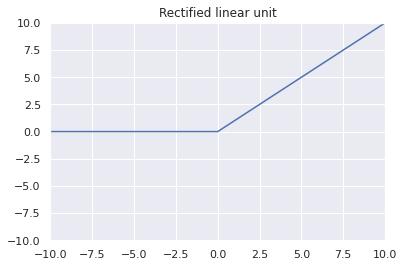

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
z = np.arange(-10, 10, .1)
zero = np.zeros(len(z))


y = np.max([zero, z], axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, y)
ax.set_ylim([-10, 10.0])
ax.set_xlim([-10, 10.0])
ax.grid(True)

ax.set_title('Rectified linear unit')

plt.show()


###Sigmoid activation


\begin{align}
y=\dfrac{1}{1+e^{-x}}
\end{align}

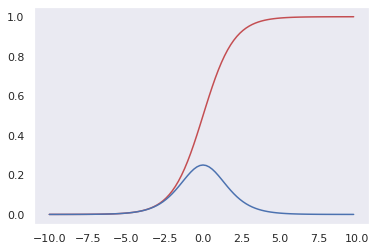

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    s = 1/(1+np.exp(-x))   
    return s

def sigmoid_derivative(x):
    s = sigmoid(x)
    ds = s*(1-s)
    return ds

values = np.arange(-10,10,0.2)

plt.plot(values, sigmoid(values), 'r')
plt.plot(values, sigmoid_derivative(values), 'b')
plt.grid()


# create the graph
plt.show()

#From scratch?


Let's take a look at some of the bones of a forward pass. The neuron analogy can be somewhat misleading so let's demistify some of the concepts before we get down to building an entie network including backpropogating our error on the fly.


Before we get around to add in a nonlinearity into the mix we're essentially looking at a linear transformation once more:
\begin{align}
y=xW^T + b
\end{align}

First hidden layer will look like:

\begin{align}
h= g(xW^T + c)
\end{align}

Where we essentially wrap the result in a nonlinearity. More on this shortly though. Let's get started!


In [ ]:
data = torch.from_numpy(X).float()

In [ ]:
#out, in
w1 = torch.randn(2,2)
w2 = torch.randn(2,)

#number of out nodes, one bias per neuron
c = torch.randn(2,)

#or xor? Give it a shot!


In [ ]:
#someone get me a transpose!
w1.t().shape

torch.Size([2, 2])

In [ ]:
data = torch.from_numpy(X).float()

print(data)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [ ]:
y = torch.from_numpy(gates['XOR'])
print(y)

tensor([0, 1, 1, 0])


In [ ]:
#let's create a basic dense layer!


In [ ]:
w1.t()

tensor([[ 0.0698, -1.1040],
        [ 1.1477,  0.1566]])

In [ ]:
w1

tensor([[ 0.0698,  1.1477],
        [-1.1040,  0.1566]])

In [ ]:
input = torch.relu(dense_1(data,w1.t() , c))
print(input)
print(input.shape)

#what's missing?

tensor([[0.0000, 2.9971],
        [0.0000, 2.6775],
        [0.0000, 3.1059],
        [0.0000, 2.7863]])
torch.Size([4, 2])
tensor([0.4370, 0.3904, 0.4528, 0.4062])


In [ ]:
input = torch.relu(dense_1(data,wone.t(), c_vec))
print(input)

##

tensor([[0., 0.],
        [1., 0.],
        [1., 0.],
        [2., 1.]])
tensor([0., 1., 1., 0.])


#or

We can apply our lineartransformation (y= xW^T + b)   directly with Pytorch here saving us all that work





In [ ]:
l = torch.nn.Linear(2,6)

In [ ]:
print(l.weight)
print(l.weight.t())
print(l.bias)

Parameter containing:
tensor([[ 0.6268,  0.4004],
        [ 0.5349,  0.1242],
        [-0.0076,  0.1693],
        [ 0.6789,  0.4353],
        [-0.6237, -0.1754],
        [-0.5713, -0.3034]], requires_grad=True)
tensor([[ 0.6268,  0.5349, -0.0076,  0.6789, -0.6237, -0.5713],
        [ 0.4004,  0.1242,  0.1693,  0.4353, -0.1754, -0.3034]],
       grad_fn=<TBackward0>)
Parameter containing:
tensor([ 0.4351,  0.5312, -0.5123,  0.1361, -0.6069, -0.5344],
       requires_grad=True)


In [ ]:
layer = l(data)
print(layer)

tensor([[ 0.4351,  0.5312, -0.5123,  0.1361, -0.6069, -0.5344],
        [ 0.8354,  0.6554, -0.3430,  0.5714, -0.7822, -0.8378],
        [ 1.0619,  1.0661, -0.5199,  0.8150, -1.2305, -1.1057],
        [ 1.4623,  1.1903, -0.3506,  1.2503, -1.4059, -1.4091]],
       grad_fn=<AddmmBackward0>)


In [ ]:
##torch.nn.Linear basically takes care of all that manual work for us!

print(y)

tensor([[ 0.4351,  0.5312, -0.5123,  0.1361, -0.6069, -0.5344],
        [ 0.8354,  0.6554, -0.3430,  0.5714, -0.7822, -0.8378],
        [ 1.0619,  1.0661, -0.5199,  0.8150, -1.2305, -1.1057],
        [ 1.4623,  1.1903, -0.3506,  1.2503, -1.4059, -1.4091]],
       grad_fn=<AddBackward0>)


In [ ]:
torch.relu(layer)

tensor([[0.1985, 0.0000, 0.0000, 0.1122],
        [0.7648, 0.0000, 0.0000, 0.2802],
        [0.0000, 0.2682, 0.0000, 0.4765],
        [0.5401, 0.0000, 0.0000, 0.6446]], device='cuda:0',
       grad_fn=<ReluBackward0>)

#Our first neural net!

In [ ]:
X = torch.from_numpy(X).float()
print(X)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [ ]:
y = torch.from_numpy(gates['XOR']).float()
print(y)

tensor([0., 1., 1., 0.])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fcin = nn.Linear(input_dim, 4)  
        self.fcout = nn.Linear(4, num_classes)

    def forward(self, x):
        x = torch.relu(self.fcin(x))
        x = torch.sigmoid(self.fcout(x))
        return x

In [ ]:
model = Net(2,1)

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.utils.data as data_utils
import torch.nn as nn
import torch.nn.functional as F

num_epochs = 10

num_classes = 2

learning_rate = .001



train = data_utils.TensorDataset(X,y)
train_loader = data_utils.DataLoader(train , batch_size=1 , shuffle=True)


model = Net(2,1).to(device)

criterionCE = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_values = []

for i in range(0 , 700) :
    total_step = len(train_loader)
    for epoch in range(num_epochs) :
        for i,(data , labels) in enumerate(train_loader) : 
            data = data.to(device)
            labels = labels.to(device)

            outputs = model(data)
            loss = criterionCE(outputs , labels.unsqueeze(1).float())
            loss_values.append(loss)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    outputs = model(X.to(device))

print (outputs)

tensor([[3.5035e-06],
        [1.0000e+00],
        [1.0000e+00],
        [1.1535e-06]], device='cuda:0', grad_fn=<SigmoidBackward0>)


In [ ]:
outputs

tensor([[3.5035e-06],
        [1.0000e+00],
        [1.0000e+00],
        [1.1535e-06]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:

print(np.where(outputs.detach().cpu().numpy() > 0.5, 1, 0))

[[0]
 [1]
 [1]
 [0]]


In [ ]:
gates['XOR']

array([0, 1, 1, 0])

In [ ]:
X = X.numpy()
y = y.numpy()

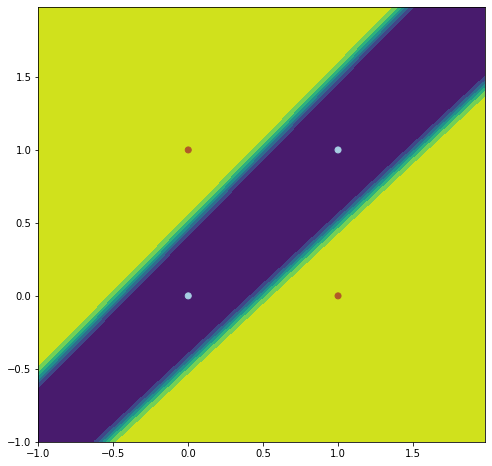

In [ ]:
plot_decision(X,y,model, output_class=False, pt = True)

# Now it's your turn!

- I've provided you with your data here  - again a binary classification problem but one that'll really take advantage of an mlp's ability to navigate difficult shaped data.

####Bonus round!

Try adding a hidden layer this time!


Once we're plugged in and learning I'll show you a neat little trick to view the evolution of it's learning per epoch!

In [ ]:
from sklearn.datasets import make_circles

X, targets = make_circles(n_samples = 1000, factor=0.1)
X_train = X[250:, :]
X_test = X[:250, :]
y_train = targets[250:]
y_test = targets[:250]

feature_vector = len(X_train[0])
input_shape = (feature_vector,)

In [ ]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [ ]:
X_test.shape

torch.Size([250, 2])

In [ ]:
#your turn - notice the clue below!
#your code here



Net(
  (fcin): Linear(in_features=2, out_features=64, bias=True)
  (fcout): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.utils.data as data_utils
import torch.nn as nn
import torch.nn.functional as F
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'



#device = 'cuda'
num_epochs = 2

num_classes = 1

learning_rate = .005



train = data_utils.TensorDataset(X_train,y_train)
train_loader = data_utils.DataLoader(train , batch_size=64 , shuffle=True)


model = Net(2,1).to(device)
#model.apply(weights_init)

criterionCE = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_values = []



for epoch in range(num_epochs) :
    for i,(data , labels) in enumerate(train_loader) : 
        data = data.to(device)
        labels = labels.to(device)

        outputs = model(data)
        #print('outputs' , outputs)
        loss = criterionCE(outputs , labels.unsqueeze(1).float())
        loss_values.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


#outputs = model(X_test.to(device))


Awesome! We're beginning to see once again the power those nonliear activation functions have.

Let's see if we can take it a step further and manifest the evolution of the decision boundarr:

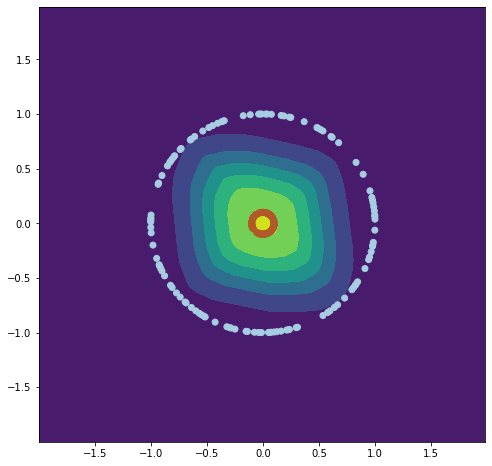

In [ ]:
#from IPython.display import clear_output
#import time

plot_decision(X_test,y_test,model, output_class=False, pt = True)
time.sleep(0.2)

#More data please!

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [ ]:
train_data = datasets.MNIST(root = '/content', 
                            train = True, 
                            download = True)


mean = train_data.data.float().mean() / 255
std = train_data.data.float().std() / 255

In [ ]:
mean

tensor(0.1307)

In [ ]:
img  = train_data[0][0]
img_large = img.resize((256,256))

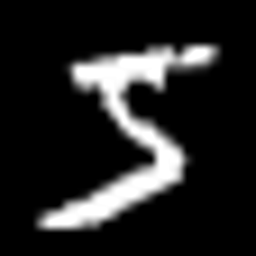

In [ ]:
img_large

We can think of digital images as the discrete pixel intensity at a specific pixel location - I(x,y) Let's visualise it in 3D to get a better idea!

In [ ]:
img_large = np.asarray(img_large)
img = img_large = np.asarray(img)

In [ ]:
import cv2

inception = cv2.imread('/content/drive/MyDrive/testing_ground/pytorch-intro/data/inception2.jpg')
gray = cv2.cvtColor(inception, cv2.COLOR_BGR2GRAY)

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def plot_3d(a,b, pic):

  xx, yy = np.mgrid[0:pic.shape[0], 0:pic.shape[1]]
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca(projection='3d')
  ax.plot_surface(xx, yy, pic ,rstride=1, cstride=1, cmap=plt.cm.gray,linewidth=0.01)
  ax.view_init(a, b)

  plt.show()


def f(a, b, pic):
    plot_3d(a,b, pic)
    

In [ ]:

inception = interactive(f,pic=widgets.fixed(gray), a=80, b=30)
display(inception)

interactive(children=(IntSlider(value=80, description='a', max=240, min=-80), IntSlider(value=30, description=…

In [ ]:
mnist = interactive(f,pic=widgets.fixed(img), a=80, b=30)
display(mnist)


interactive(children=(IntSlider(value=80, description='a', max=240, min=-80), IntSlider(value=30, description=…

To classify inception posters or indeed specific objects regardless of the context of the poster we'd need something a little more complex like a convolutional neural network but for now let's look at how we can tackle something a little simpler and visit the classic mnist handwriting dataset

# Data-prep

In [ ]:
train_transforms = transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize(mean = [mean], std = [std])
                                      ])

test_transforms = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean = [mean], std = [std])
                                     ])

In [ ]:
train_data = datasets.MNIST(root = 'data', 
                            train = True, 
                            download=True,
                            transform = train_transforms)

test_data = datasets.MNIST(root = 'data', 
                           train = False, 
                           download = True,
                           transform = test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
from torch.utils.data import DataLoader
train_loader =  torch.utils.data.DataLoader(train_data, 
                                          batch_size=64, 
                                          shuffle=True, 
                                          num_workers=1)
test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size=64, 
                                          shuffle=True, 
                                          num_workers=1)


Now it's over to you!

Hints -

What about our last layer? Last time we were dealing with a binary classifiction problem so where are we headed here?

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()

        self.fcin = nn.Linear(input_dim, 64)  
        self.fchidden = nn.Linear(64, 4)

        #missing code?
        
    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = torch.relu(self.fcin(x))
        x = torch.relu(self.fchidden(x))
        x =  #missing code

        #Once again don't forget we don't need softmax here

        return x


#net = Net(2, 1)

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.utils.data as data_utils
import torch.nn as nn
import torch.nn.functional as F
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

#device = 'cuda'
num_epochs = 10

num_classes = 10
input_shape = 28*28

learning_rate = .01




model = Net(input_shape,num_classes).to(device)

criterionCE = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_values = []



for epoch in range(num_epochs) :
    for (data , labels) in train_loader: 
        data = data.to(device)
        labels = labels.to(device)

        outputs = model(data)
        loss = criterionCE(outputs , labels)
        loss_values.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


  

In [ ]:
examples = enumerate(test_loader)
batch_idx, (data, targets) = next(examples)

In [ ]:
with torch.no_grad():
  res = model(data.to(device))

In [ ]:
res.shape

torch.Size([64, 10])

In [ ]:
print(pred[0].item())


1


In [ ]:
pred[1]

tensor([0], device='cuda:0')

In [ ]:
output  = [res.data.max(1, keepdim=True)[1][i].item() for i in range(10)]
print(output)

[1, 7, 4, 0, 8, 1, 6, 4, 9, 5]


In [ ]:
#class_names = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

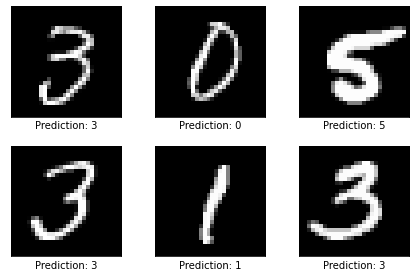

In [ ]:
plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(data[i][0].cpu(), cmap='gray', interpolation='none')
  plt.xlabel("Prediction: {}".format(pred[i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

#Cifar 10

Let's take a step up to something a little more complex and take a look at what a convolutional neural network can do for us!

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torchvision import transforms
from torchvision.utils import save_image
import torch.optim as optim

In [ ]:
#The mean and standard deviation of Imagenet!
mean = [0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
val_size = 10000 


#giving us a mean of 0.0 and and std of 1.o
tranform_train = transforms.Compose([transforms.Resize((224,224)), transforms.RandomHorizontalFlip(p=0.7), transforms.ToTensor(), transforms.Normalize(mean=mean, std=std)])
tranform_test = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.Normalize(mean=mean, std=std)])

def inverse_normalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor


train_ds = CIFAR10("data/", train=True, download=True, transform=tranform_train) 
train_size = len(train_ds) - val_size
train_ds, val_ds = random_split(train_ds, [train_size, val_size])
test_ds = CIFAR10("data/", train=False, download=True, transform=tranform_test)


train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=64, shuffle=False)
test_dl = DataLoader(test_ds, batch_size=64, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


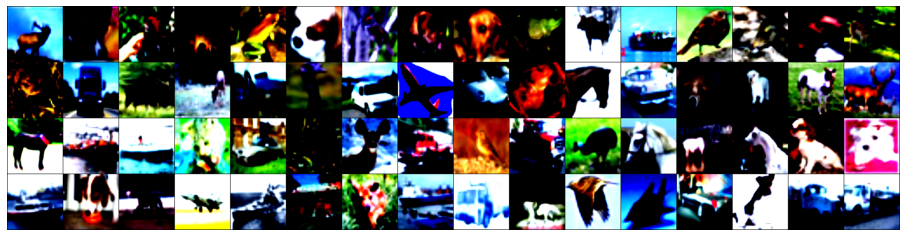

In [ ]:
for images, _ in train_dl:
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

torch.Size([64, 3, 224, 224])


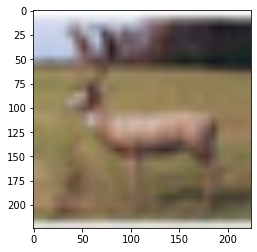

In [ ]:
import time

for batch_idx, (data, targets) in enumerate(train_dl):
        print(data.shape)
        data = data.to(device=device)
        img = inverse_normalize(tensor=data[0], mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
        img = np.transpose(data[0].cpu(),(1,2,0))
        plt.imshow(img)
        break

Notice the unique architecture here. Stacked convolutions followed by pooling!

![VGG16](https://www.researchgate.net/profile/Max-Ferguson/publication/322512435/figure/fig3/AS:697390994567179@1543282378794/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only.png)

In [ ]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)

        self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)

        self.conv3_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)

        self.conv4_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        self.conv5_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        #Else setting to eval mode an exporting will throow an error
        self.dropout = nn.Dropout(p=0.5)

        self.fc1 = nn.Linear(25088, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 10)

    def forward(self, x):
        x = torch.relu(self.conv1_1(x))
        x = torch.relu(self.conv1_2(x))
        x = self.maxpool(x)
        x = torch.relu(self.conv2_1(x))
        x = torch.relu(self.conv2_2(x))
        x = self.maxpool(x)
        x = torch.relu(self.conv3_1(x))
        x = torch.relu(self.conv3_2(x))
        x = torch.relu(self.conv3_3(x))
        x = self.maxpool(x)
        x = torch.relu(self.conv4_1(x))
        x = torch.relu(self.conv4_2(x))
        x = torch.relu(self.conv4_3(x))
        x = self.maxpool(x)
        x = torch.relu(self.conv5_1(x))
        x = torch.relu(self.conv5_2(x))
        x = torch.relu(self.conv5_3(x))
        x = self.maxpool(x)
        x = x.reshape(x.shape[0], -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x) 
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

Now the beautiful thing about working in such a Pythonic scenario is that we can throw together all kinds of functions to work alongside our training pipeline. 

As an example let's go ahead and throw together something somehwat similar to Tensorflow/Keras' lambda callback, essentially allowing us to interject during training and manifest whatever overview of progress we need.

##Mini challenge 

Note below, given time constraint I've added the validation function you need at the end of each epoch. Simply marry the visualisation function we used above with below and let's discuss what we think might happen in our training loop!

In [ ]:
from IPython.display import clear_output

def val_viz(epoch):
  

  class_names = ["Plane","Car","Bird","Cat","Deer",
                "Dog", "Frog","Horse","Boat","Truck"]


  #clear previous viz an output after each epoch
  clear_output(wait=True)

  with torch.no_grad():
        num_correct = 0
        num_samples = 0
        for batch_idx, (data,targets) in enumerate(val_dl):
            data = data.to(device=device)
            targets = targets.to(device=device)
            ## Forward Pass
            res = model(data)
            _, pred = res.max(1)
        

            #Metrics
            num_correct += (pred == targets).sum()
            num_samples += pred.size(0)
        
        accuracy = round(float(num_correct) / float(num_samples) * 100)        

        print(f'epoch {epoch}\nAccuracy: {accuracy}')
        #viz last batch
        plt.figure(figsize=(10,10))
        for i in range(16):

          
          #convert our validation data back to it's original state
          img = inverse_normalize(tensor=data[i], mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
          img  = np.transpose(data[i].cpu(),(1,2,0))

          plt.subplot(4,4,i+1)
          plt.tight_layout()
          plt.imshow(img, interpolation='none')
          plt.xlabel("Prediction: {}".format(class_names[pred[i].item()]))
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
        plt.show()




In [ ]:
model = VGG16() 
model = model.to(device=device) #Remember here we set our device automatically according to what hardware is available

## Loss and optimizer
learning_rate = 1e-4 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= learning_rate)

epoch 10
Accuracy: 79


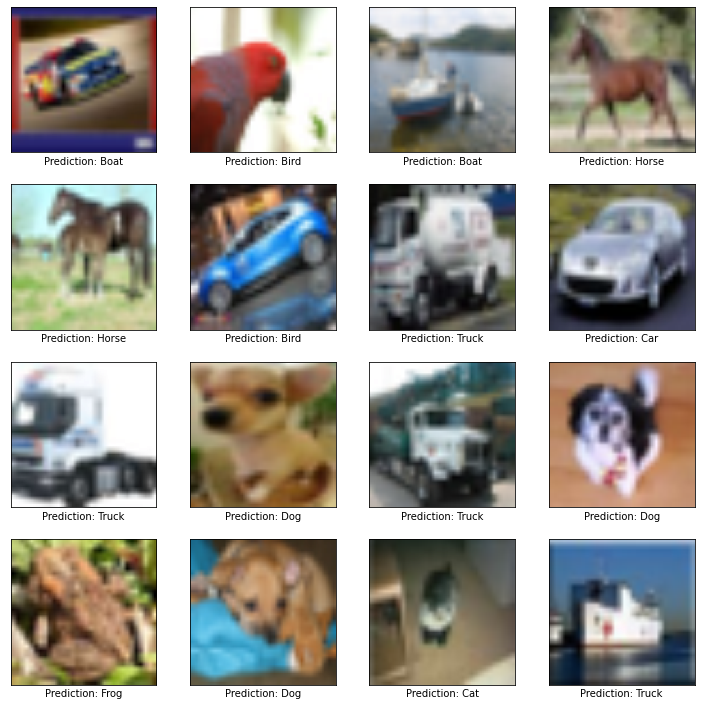

KeyboardInterrupt: ignored

In [ ]:
for epoch in range(100):
    loss_ep = 0
    
    for batch_idx, (data, targets) in enumerate(train_dl):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        optimizer.zero_grad()
        scores = model(data)
        loss = criterion(scores,targets)
        loss.backward()
        optimizer.step()
        loss_ep += loss.item()
    print(f"Loss: {loss_ep/len(train_dl)}")

    val_viz(epoch)

In [ ]:
torch.save(model.state_dict(), "/content/cifar.pt") #SAVES THE TRAINED MODEL



In [ ]:
model = VGG16()
model.load_state_dict(torch.load("/content/cifar.pt")) #loads the trained model
model.eval()

VGG16(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_3): Conv2d(512, 51

##Sending our little neural net baby on it's way

Now that we have a decent model available it's super easy with the Pytorch in all manner of scenarios. with the built in [ONNX](https://onnx.ai/) support.

In [ ]:
#Onnx

from torch.autograd import Variable
import torch.onnx
import torchvision
import torch


if torch.cuda.is_available():
  device = torch.device('cuda')
  print('using gpu!')
else:
  device = torch.device('cpu')
 
model = VGG16()
model.eval()
 
dummy_input = Variable(torch.randn(1, 3, 224, 224))
state_dict = torch.load('/content/cifar.pt', map_location=device)
model.load_state_dict(state_dict)
torch.onnx.export(model, dummy_input, "/content/cifar.onnx", opset_version=13)

using gpu!


In [ ]:
!pip install -U kora

from kora.drive import upload_public
from IPython.display import HTML


In [ ]:
url = 'https://drive.google.com/uc?id=11eibnodv9AyJelpKSZZFUk-na0AHumEy'

HTML(f"""<video src={url} width=800 height=500 controls/>""")